# Exam 2 Review - Solutions

## <u>Case Study</u>: U.K. Smoker's Dataset

In this Exam 2 Review, we will explore our U.K. smoking dataset again.

Recall, that this dataset is comprised of a random sample of 421 smokers that live in the U.K.

The dataset contains information about the smokers including their:
* sex
* age
* marital status
* highest qualification
* nationality
* gross income
* region of the U.K. that live in.

The dataset also contains information about the habits of each of the smokers including:
* the amount of cigarettes that they smoke on the weekends
* the amount of cigarettes that they smoke on the weekdays
* the type of cigarettes that they smoke.




## Preliminary
### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf

### Read the smoking.csv into a dataframe called df.

In [2]:
df=pd.read_csv('smoking.csv')
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


In [3]:
df.dtypes

sex                      object
age                       int64
marital_status           object
highest_qualification    object
nationality              object
gross_income             object
region                   object
smoke                    object
amt_weekends              int64
amt_weekdays              int64
type                     object
dtype: object

In [4]:
df['gross_income'].unique()

array(['Under 2,600', 'Above 36,400', '2,600 to 5,200', '5,200 to 10,400',
       'Refused', '15,600 to 20,800', '20,800 to 28,600',
       '10,400 to 15,600', '28,600 to 36,400', 'Unknown'], dtype=object)

## Population Mean Inference

We would first like to conduct inference on the average number of cigarettes ALL UK smokers smoke on the weekends.

### First, check the conditions on conducting this type of inference.

1. The sample size is n = 421 >30 (we could have also tried to check if the sample/population distribution of the number of cigarettes smoked on the weekends is normally distributed.
2. The sample is randomly collected.
3. The sample size n=421 <10% of the UK smoker population. 

Thus because the conditions are met, we are allowed to conduct inference on the population mean number of cigarettes smoked on the weekends for all of the UK smokers.

In [5]:
df.shape

(421, 11)

### Next, calculate a 90% confidence interval for this population mean.

Because we don't know $\sigma$ (the population standard deviation), we must use $s$ instead of $\sigma$ and use the t distribution (with $df=n-1=421-1$ degrees of freedom) for the critical value instead of the z-distribution (ie. standard normal distribution).

In [6]:

#n
n=421
print('n',n)

#alpha = 1- confidence level
alpha=0.10
print('alpha', alpha)

# Critical Value
critical_value=t.ppf(1-alpha/2, df=n-1)
print('critical_value', critical_value)

# sample mean
sample_mean=df['amt_weekdays'].mean()
print('sample mean', sample_mean)


# sample standard deviation
sample_std=df['amt_weekdays'].std()
print('sample standard deviation', sample_std)

# standard error
se=sample_std/np.sqrt(n)
print('standard error', se)

n 421
alpha 0.1
critical_value 1.648489713050696
sample mean 13.750593824228028
sample standard deviation 9.388292145456381
standard error 0.4575573621826023


In [7]:
# Confidence interval lower bound
cl_lower=sample_mean-critical_value*se

# Confidence interval upper bound
cl_upper=sample_mean+critical_value*se

print('90% Confidence Interval')
print(cl_lower,cl_upper)

90% Confidence Interval
12.996315219539397 14.50487242891666


### Put this confidence interval into words (ie. interpret it).

We are 90% confident that the average number of cigarattes smoked by all people in the UK on a weekend is between 12.996 and 14.505.

### If we were to collect 1000 random samples, each of size n=421 of UK smokers with replacement, and create a 90% confidence interval with each of these random samples for the average number of weekend cigarettes smoked by all UK smokers, what percent of these confidence intervals would we expect to contain the *actual* average average number of weekend cigarettes smoked by all UK smokers?

900=0.90*1000

### We would like to test if the average UK smoker smokes a number of weekend cigarattes that is different than the amount in a general pack of cigarettes (ie 20). Formulate the hypotheses that would test this claim.

$H_0: \mu=20$

$H_A: \mu\neq 20$

### Evaluate these hypotheses with the 90% confidence interval.

The null value ($\mu=20$) is not inside the 90% confidence interval, therefore we reject the null hypothesis. Thus there is sufficient evidence to suggest that the average UK smoker smokes a number of weekend cigarettes that is not equal to 20.

### Evaluate these hypotheses using a p-value and the $\alpha$ that corresponds to a 90% confidence interval.

In [8]:
t_stat=(sample_mean-20)/se
t_stat

-13.658191720403254

In [9]:
p_value=2*(1-t.cdf(np.abs(t_stat), df=n-1))
p_value

0.0

Because the $p-value\approx 0<\alpha=.10$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the average UK smoker smokes a number of weekend cigarettes that is not equal to 20.

### Standard Normal Distribution and t-distribution Theory/Properties Questions 

1. Does the standard normal distribution or the t-distribution have thicker tails?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



The t-distribution.

2. In general, (all else held equal) which will produce a wider 95% confidence interval: one created with a critical value that is an observation from the standard normal (z) distribution or one created with a critical value that is an observation from the t-distribution?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

Because the t-distribution has thicker tails, the critical value (t) (and -t) have to be further away from the center of the distribution (ie 0) in order to encapsulate 95% in the middle. Thus the critical value (t) from the t-distribution will be larger than the critical value (Z) from the z-distribution. Thus the 95% confidence interval will be wider, all else held equal.

## Population Mean Difference Inference

Next, we would first like to conduct inference on the difference between the average number of cigarettes ALL female UK smokers smoke on the weekends and the average number of cigarettes ALL male UK smokers smoke on the weekends.

### First, check the conditions on conducting this type of inference.

1. The sample size of females is n = 234 >30 (we could have also tried to check if the sample/population distribution of the number of cigarettes smoked by females on the weekends is normally distributed).
2. The sample of UK females is randomly collected.
3. The sample size n=234 <10% of the UK female smoker population. 

4. The sample size of males is n = 187 >30 (we could have also tried to check if the sample/population distribution of the number of cigarettes smoked by males on the weekends is normally distributed).
5. The sample of UK males is randomly collected.
6. The sample size n=187 <10% of the UK males smoker population. 

7. We should also check that the males and females were collected independently in this study. (For instance, if the males and females in this sample were married to to eachother, then the male and female respondents would not be indenpendent of each other).

Thus because the conditions are met, we are allowed to conduct inference on the difference between the average number of cigarettes ALL female UK smokers smoke on the weekends and the average number of cigarettes ALL male UK smokers smoke on the weekends.

In [10]:
df['sex'].value_counts()

Female    234
Male      187
Name: sex, dtype: int64

### Next, calculate a 99% confidence interval for this population mean difference.

Because we don't know $\sigma_f$ and $\sigma_m$ (the population standard deviations), we must use $s_f$ and $s_m$ instead and use the t distribution (with $df=min(n_f-1,n_m-1)=min(234-1,187-1)=186$ degrees of freedom) for the critical value instead of the z-distribution (ie. standard normal distribution).

In [11]:

#n
nf=234
nm=187
print('nf',nf)
print('nm',nm)

#alpha = 1- confidence level
alpha=0.01
print('alpha', alpha)

# Critical Value
critical_value=t.ppf(1-alpha/2, df=186)
print('critical_value', critical_value)

# sample mean
sample_mean_f=df[df['sex']=='Female']['amt_weekdays'].mean()
print('sample mean females', sample_mean_f)
sample_mean_m=df[df['sex']=='Male']['amt_weekdays'].mean()
print('sample mean males', sample_mean_m)

# sample standard deviation
sample_std_f=df[df['sex']=='Female']['amt_weekdays'].std()
print('sample standard deviation females', sample_std_f)
sample_std_m=df[df['sex']=='Male']['amt_weekdays'].std()
print('sample standard deviation male', sample_std_m)

# standard error
se=np.sqrt(sample_std_f**2/nf+sample_std_m**2/nm)
print('standard error', se)

nf 234
nm 187
alpha 0.01
critical_value 2.6025196219606745
sample mean females 12.02991452991453
sample mean males 15.903743315508022
sample standard deviation females 7.353370836127314
sample standard deviation male 11.086237564277987
standard error 0.9425080263671314


In [12]:
# Confidence interval lower bound
cl_lower=(sample_mean_f-sample_mean_m)-critical_value*se

# Confidence interval upper bound
cl_upper=(sample_mean_f-sample_mean_m)+critical_value*se

print('99% Confidence Interval')
print(cl_lower,cl_upper)

99% Confidence Interval
-6.3267244180693805 -1.4209331531176037


### Put this confidence interval into words (ie. interpret it).

We are 99% confident that the difference in the average number of cigarattes smoked by all females in the UK on a weekend and the average number of cigarattes smoked by all males in the UK on a weekend is between -6.327 and -1.421.

### We would like to test if there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. Formulate the hypotheses that would test this claim.

$H_0: \mu_f-\mu_m=0$

$H_A: \mu_f-\mu_m\neq 0$

### Evaluate these hypotheses with the 99% confidence interval.

The null value ($\mu_{f}-\mu_m=0$) is not inside the 99% confidence interval, therefore we reject the null hypothesis. Thus there is sufficient evidence to suggest  there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. In other words, there is sufficient evidence to suggest that there is an association between sex and weekend smoking habits in the UK.

### Evaluate these hypotheses using a p-value and the $\alpha$ that corresponds to a 99% confidence interval.

In [13]:
t_stat=((sample_mean_f-sample_mean_m)-0)/se
print('Test Statistic', t_stat)

Test Statistic -4.110128165725069


In [14]:
p_value=2*(1-t.cdf(np.abs(t_stat), df=186))
print('p-value', p_value)

p-value 5.925187558109002e-05


Because the $p-value\approx 0 <\alpha=.01$, we reject the null hypothesis. Thus there is sufficient evidence to there is a difference in the average number of weekend cigarettes females in the UK smoke vs the average number of weekend cigarettes males in the UK smoke. In other words, there is sufficient evidence to suggest that there is an association between sex and weekend smoking habits in the UK.

### Intuition Behind Population Mean Difference Infererence

Use the test statistic and p-value that you calculated in this problem to fill in the blanks for (1)-(20) in the attached pdf.

The questions in the pdf are to designed to test that you know that's "going on behind the scenes" when we calculate the p-value and use it to make a conclusion.

<u>Answers:</u>:

(1) sa


## Population Proportion Inference

We would first like to conduct inference on the proportion of all UK smokers that smoke packets.

### Confidence Interval

#### First, check the conditions for creating a confidence interval (first assuming we have no hypothesis we'd like to test).

<u>Because we are not assuming that there is a hypothesis test (yet), we will use $\hat{p}$ in the conditions as well as the standard error.</u>

1. The sample size is $n\hat{p} = 421(0.705) \geq 10$ and $n(1-\hat{p})=421(1-\hat{p})\geq 10$
2. The sample is randomly collected.
3. The sample size n=421 <10% of the UK smoker population. 

Thus because the conditions are met, we are allowed to create a confidence interval for the proportion of all UK smokers that smoke packets.

In [15]:
df.shape

(421, 11)

In [16]:
df['type'].value_counts()

Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: type, dtype: int64

In [17]:
sample_proportion = 297/421
sample_proportion

0.7054631828978623

#### Next, calculate a 95% confidence interval for this population proportion.

We always use the z-distribution for inference on a population proportion.

In [18]:

#n
n=421
print('n',n)

#alpha = 1- confidence level
alpha=0.05
print('alpha', alpha)

# Critical Value
critical_value=norm.ppf(1-alpha/2)
print('critical_value', critical_value)

# sample proportion
sample_proportion=(df['type']=='Packets').sum()/n
print('sample proportion', sample_proportion)

# standard error
se=np.sqrt(sample_proportion*(1-sample_proportion)/n)
print('standard error', se)

n 421
alpha 0.05
critical_value 1.959963984540054
sample proportion 0.7054631828978623
standard error 0.022216002902696867


In [19]:
# Confidence interval lower bound
cl_lower=sample_proportion-critical_value*se

# Confidence interval upper bound
cl_upper=sample_proportion+critical_value*se

print('99% Confidence Interval')
print(cl_lower,cl_upper)

99% Confidence Interval
0.6619206173281391 0.7490057484675854


#### Put this confidence interval into words (ie. interpret it).

We are 99% confident that the proportion of UK smokers that smoke packets is between 66.19% and 74.90%.

### Hypothesis Testing

#### Next, we would like to test if the proportion of UK smokers smoke packets is different from 70%. Formulate the hypotheses that would test this claim.

$H_0: p=0.7$

$H_A: p \neq 0.7$

#### Next, check the conditions for conducting this hypothesis test.

<u>Because in our hypothesis tests we assume $H_0: p=0.7$, we will use  $p_0=0.7$ in the conditions as well as the standard error in this hyopthesis test.</u>

1. The sample size is $np_0 = 421(0.70) \geq 10$ and $n(1-p_0)=421(1-0.70)\geq 10$
2. The sample is randomly collected.
3. The sample size n=421 <10% of the UK smoker population. 

Thus because the conditions are met, we are allowed to conduct this hypothesis test.

#### Next, calculate a 95% confidence interval for this population proportion, that will be used to evaluate our hypotheses above.

This will be the same calculations as before, except now we will use the null value $p_0=0.70$ in the standard error (instead of the sample proportion.

In [20]:
p_0=0.70

In [21]:

#n
n=421
print('n',n)

#alpha = 1- confidence level
alpha=0.05
print('alpha', alpha)

# Critical Value
critical_value=norm.ppf(1-alpha/2)
print('critical_value', critical_value)

print('null value', p_0)

# standard error
se=np.sqrt(p_0*(1-p_0)/n)
print('standard error', se)

n 421
alpha 0.05
critical_value 1.959963984540054
null value 0.7
standard error 0.02233410735946129


In [22]:
# Confidence interval lower bound
cl_lower=sample_proportion-critical_value*se

# Confidence interval upper bound
cl_upper=sample_proportion+critical_value*se

print('99% Confidence Interval')
print(cl_lower,cl_upper)

99% Confidence Interval
0.6616891368464671 0.7492372289492574


#### Evaluate these hypotheses with the 95% confidence interval.

The null value ($p=0.70$) is inside the 95% confidence interval, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the proportion of UK smokers that smoke packets is different from 70%.

#### Evaluate these hypotheses using a p-value and the $\alpha$ that corresponds to a 95% confidence interval.

In [23]:
z_stat=(sample_proportion-.7)/se
z_stat

0.2446116520321979

In [24]:
p_value=2*(1-norm.cdf(np.abs(z_stat)))
p_value

0.8067571410919188

Because the $p-value=0.807\geq \alpha=.05$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the proportion of UK smokers that smoke packets is different from 70%.

## Population Proportion Difference Inference

Next we would like to see if there is a difference in the proportion of Scottish people that smoke packets and the proportion of non-Scottish people that smoke packets.

### First do the necessary data manipulations to df in order to set up this test.

In [25]:
df['nationality'].unique()

array(['British', 'English', 'Welsh', 'Irish', 'Scottish', 'Other',
       'Unknown', 'Refused'], dtype=object)

In [26]:
df['is_scottish']=df['nationality']
df['is_scottish'][df['is_scottish']!='Scottish']='Not_Scottish'


<ipython-input-26-ca02f3b98d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_scottish'][df['is_scottish']!='Scottish']='Not_Scottish'


In [27]:
df['is_packet']=df['type']
df['is_packet'][df['is_packet']!='Packets']='Not_Packets'
df.head()

<ipython-input-27-167b46b47bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_packet'][df['is_packet']!='Packets']='Not_Packets'


,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,is_scottish,is_packet
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets,Not_Scottish,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets,Not_Scottish,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled,Not_Scottish,Not_Packets
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets,Not_Scottish,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets,Not_Scottish,Packets


### Now, check the conditions for creating a confidence interval for the difference in the proportion of Scottish citizens that smoke packets vs the proportion of non-Scottish citizens that smoke packets.

1. $n_{scot}\hat{p}_{scot} = 45(.73) \geq 10$ and $n_{scot}(1-\hat{p}_{scot}) = 45(1-.73) \geq 10$
2. The sample Scottish citizens that smoke is randomly collected.
3. The sample size $n_{scot}=45 <10$% of all Scottish citizens that smoke. 
4. $n_{nonscot}\hat{p}_{nonscot} = 376(.70) \geq 10$ and $n_{nonscot}(1-\hat{p}_{nonscot}) = 376(1-.70) \geq 10$
5. The sample non-Scottish citizens that smoke is randomly collected.
6. The sample size $n_{nonscot}=376 <10$% of all non-Scottish citizens that smoke. 
7. The observtions in the sample of Scottish citizens that smoke is independent of the observations in the sample of non-Scottish citizens that smoke.

Thus because the conditions are met, we are allowed to conduct inference on the difference in the proportion of ALL Scottish citizens that smoke packets vs the proportion of ALL non-Scottish citizens that smoke packets.

In [28]:
df['is_scottish'].value_counts()

Not_Scottish    376
Scottish         45
Name: is_scottish, dtype: int64

In [29]:
df_cross=pd.crosstab(df['is_scottish'], df['is_packet'], normalize='index')
df_cross

is_packet,Not_Packets,Packets
is_scottish,,
Not_Scottish,0.297872,0.702128
Scottish,0.266667,0.733333


### Now create a 92% confidence interval for the difference in the proportion of Scottish citizens that smoke packets vs the proportion of non-Scottish citizens that smoke packets.

We always use the z-distribution for inference on a population proportion differences.

In [30]:

#n
n_scot=45
n_not_scot=376
print('n_scot',n_scot)
print('n_not_scot',n_not_scot)

#alpha = 1- confidence level
alpha=0.08
print('alpha', alpha)

# Critical Value
critical_value=norm.ppf(1-alpha/2)
print('critical_value', critical_value)

# sample proportions
sample_prop_scot=df_cross['Packets']['Scottish']
print('sample_prop_scot', sample_prop_scot)
sample_prop_non_scot=df_cross['Packets']['Not_Scottish']
print('sample_prop_non_scot', sample_prop_non_scot)


# standard error
se=np.sqrt((sample_prop_scot*(1-sample_prop_scot))/n_scot +   (sample_prop_non_scot*(1-sample_prop_non_scot))/n_not_scot)
print('standard error', se)

n_scot 45
n_not_scot 376
alpha 0.08
critical_value 1.7506860712521692
sample_prop_scot 0.7333333333333333
sample_prop_non_scot 0.7021276595744681
standard error 0.0700136711170732


In [31]:
# Confidence interval lower bound
cl_lower=(sample_prop_scot-sample_prop_non_scot)-critical_value*se

# Confidence interval upper bound
cl_upper=(sample_prop_scot-sample_prop_non_scot)+critical_value*se

print('92% Confidence Interval')
print(cl_lower,cl_upper)

92% Confidence Interval
-0.09136628506302517 0.15377763258075555


### Put this confidence interval into words (ie. interpret it).

We are 92% confident that the difference in the proportion of Scottish smokers that smoke packets and the proportion of non-Scottish smokers that smoke packets is between -9.1% and 15.4%.

### We would like to test if ther is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. Formulate these hypotheses.

$H_0: p_{scot}-p_{nonscot}=0$

$H_A: p_{scot}-p_{nonscot}\neq 0$

### Evaluate these hypotheses with the 92% confidence interval.

The null value ($\mu_{scot}-\mu_{nonscot}=0$) is in the 92% confidence interval, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that there is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. In other words, there is not sufficient evidence to suggest that there is an association with being Scottish and smoking Packets.

### Evaluate these hypotheses using a p-value and the $\alpha$ that corresponds to a 95% confidence interval.

In [32]:
z_stat=((sample_prop_scot-sample_prop_non_scot)-0)/se
z_stat

0.44570829183752825

In [33]:
p_value=2*(1-norm.cdf(np.abs(z_stat)))
p_value

0.6558079742088874

Because the $p-value=0.656\geq \alpha=.08$, therefore we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that there is a difference in the proportion of Scottish smokers that smoke Packets is different than the proportion of non-Scottish smokers that smoke packets. In other words, there is not sufficient evidence to suggest that there is an association with being Scottish and smoking Packets.

## Linear Regression

### Full Linear Regression Model
Next we would like to formulate a 'full' linear regression model modeling a response variable of amt_weekends with the following explanatory variables:
* amt_weekdays
* age
* sex
* and interaction of age and sex

### First give the linear regression equation.

In [34]:
full_model = smf.ols('amt_weekends ~ amt_weekdays  + age + sex +age*sex', 
               data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.22e-94
Time:                        21:54:47   Log-Likelihood:                -1338.9
No. Observations:                 421   AIC:                             2688.
Df Residuals:                     416   BIC:                             2708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8249      1.126      6.064      0.000       4.613       9.037
sex[T.Male]         0.5727      1.627      0.352      0.725      -2.625       3.771
amt_weekdays        0.8685      0.032     27.217      0.000       0.806       0.931
age                -0.0538      0.024     -2.247      0.025      -0.101      -0.007
age:sex[T.Male]    -0.0163      0.036     -0.457      0.648      -0.087       0.054
==============================================================================
Omnibus:                       98.192   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.956
Skew:                           0.237   Prob(JB):                         0.00
Kurtosis:                      14.861   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{amtweekend} = 6.82+.5727*(sexmale) + .8685*amtweekdays -0.0538*age -0.0163*(age*sexmale)$

### Predict the number of cigarettes a 25 year old male smokes on the weekend, that smokes 10 cigarettes on the weekdays, BY HAND.

In [35]:
amt_weekend = 6.82+.5727*(1) + .8685*10 -0.0538*25 -0.0163*(25*1)
amt_weekend

14.325199999999999

### Then make this prediction with Python.

In [36]:
full_model.predict(exog=dict(age=25, amt_weekdays=10, sex='Male'))

0    14.330227
dtype: float64

### Next, check the linear regression conditions.

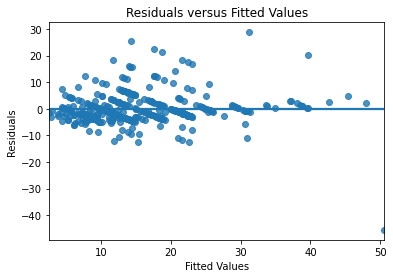

In [37]:
# residual plot for inital check on the model fit
sns.regplot(x=full_model.fittedvalues, y=full_model.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

1. **Linearity Condition**: This condition looks mostly met. For most x-axis windows (going left to right) in the plot above, we see that the points are mostly equally distributed above and below the line.

2. **Constant Variance of Residuals Condition:** This condition, however is not met. We see that the y-axis spread changes as we move from left to right in the plot above.

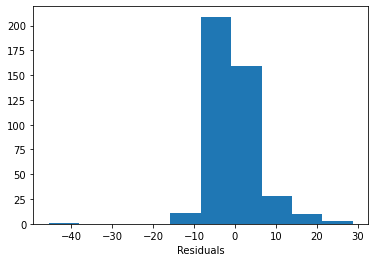

In [38]:
plt.hist(full_model.resid)
plt.xlabel('Residuals')
plt.show()

3. **Normally Distributed Residuals and Mean of 0 Condition':** This condition looks like it is mostly met as the histogram is mostly symmetric, unimodal, and centered at 0.

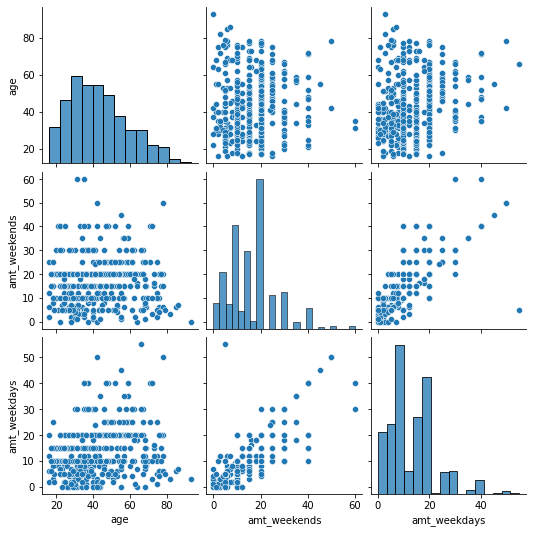

In [39]:
sns.pairplot(df)
plt.show()

In [40]:
df.corr()

,age,amt_weekends,amt_weekdays
age,1.000000,0.058642,0.192783
amt_weekends,0.058642,1.000000,0.802052
amt_weekdays,0.192783,0.802052,1.000000


4. **No Multi-Collinearity Condition**: The two numerical explanatory variables (age and amt_weekdays) do not have a strong linear relationship. Thus the explanatory variables are not collinear and so this condition (just for multiple linear regression) is met.

5. **Independence of Residuals Condition**

Because the sample of U.K. Smokers is random and $n<10$% of all U.K. smokers, we know that this condition is not violated in this particular way.

## Linear Transformations of a Linear Regression
Refit a new 'full' linear regression model modeling a response variable of sqrt(amt_weekends) with the following explanatory variables:
* sqrt(amt_weekdays)
* age
* sex
* and interaction of age and sex

In [41]:
df['sqrt_amt_weekends']=np.sqrt(df['amt_weekends'])
df['sqrt_amt_weekdays']=np.sqrt(df['amt_weekdays'])

df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,is_scottish,is_packet,sqrt_amt_weekends,sqrt_amt_weekdays
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets,Not_Scottish,Packets,3.464102,3.464102
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets,Not_Scottish,Packets,2.449490,2.449490
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled,Not_Scottish,Not_Packets,2.828427,2.828427
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets,Not_Scottish,Packets,3.872983,3.464102
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets,Not_Scottish,Packets,2.449490,3.464102


In [42]:
full_model = smf.ols('sqrt_amt_weekends ~ sqrt_amt_weekdays  +sex+ age+ age*sex', 
               data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sqrt_amt_weekends   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           5.79e-92
Time:                        21:54:49   Log-Likelihood:                -486.05
No. Observations:                 421   AIC:                             982.1
Df Residuals:                     416   BIC:                             1002.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5595      0.165      9.463      0.000       1.236       1.883
sex[T.Male]          -0.1012      0.214     -0.472      0.637      -0.523       0.320
sqrt_amt_weekdays     0.7695      0.029     26.974      0.000       0.713       0.826
age                  -0.0084      0.003     -2.672      0.008      -0.015      -0.002
age:sex[T.Male]       0.0017      0.005      0.361      0.718      -0.008       0.011
==============================================================================
Omnibus:                       59.185   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.806
Skew:                          -0.404   Prob(JB):                     1.63e-74
Kurtosis:                       7.327   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check the conditions again.

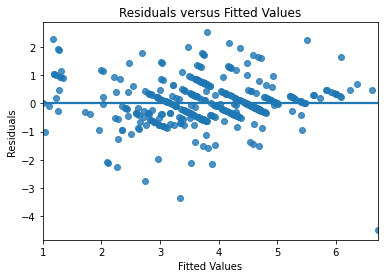

In [43]:
# residual plot for inital check on the model fit
sns.regplot(x=full_model.fittedvalues, y=full_model.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

1. **Linearity Condition**: This condition looks mostly met. For most x-axis windows (going left to right) in the plot above, we see that the points are mostly equally distributed above and below the line.

2. **Costant Variance of Residuals Condition:** This condition, now looks mostly met. We see that the y-axis spread mostly does not change as we move from left to right in the plot above.

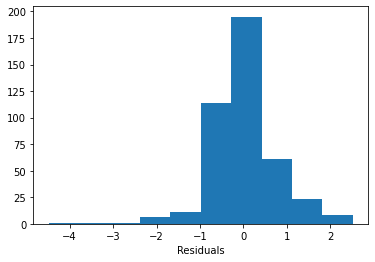

In [44]:
plt.hist(full_model.resid)
plt.xlabel('Residuals')
plt.show()

3. **Normally Distributed Residuals and Mean of 0 Condition':** This condition looks like it is mostly met as the histogram is mostly symmetric, unimodal, and centered at 0.

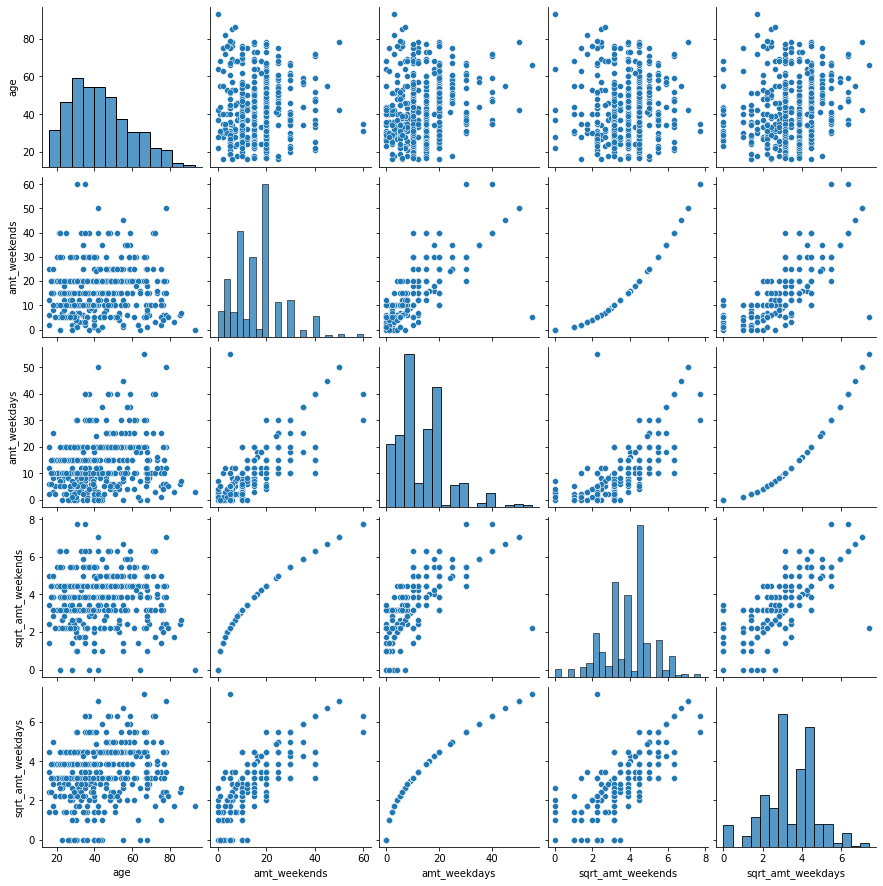

In [45]:
sns.pairplot(df)
plt.show()

4. **No Multi-Collinearity Condition**: The two numerical explanatory variables (age and sqrt_amt_weekdays) do not have a strong linear relationship. Thus the explanatory variables are not collinear and so this condition (just for multiple linear regression) is met.

5. **Independence of Residuals Condition**

Because the sample of U.K. Smokers is random and $n<10$% of all U.K. smokers, we know that this condition is not violated in this particular way.

## Linear Regression Inference
### Create a 95% confidence interval for the population slope for sex_male in this model. Use it to evaluate whether there is sufficient evidence to suggest the population slope for this explanatory variable indicator is non-zero.

#### First formulate the hypotheses.

$H_0: \beta_1=0$

$H_A: \beta_1\neq 0$

Remember, for inference on population slopes in a LINEAR regression equation, we use the t-distribution.

In [46]:
#n
n=421
print('n',n)

#p
p=4
print('Number of slopes = p',p)

#alpha = 1- confidence level
alpha=0.05
print('alpha', alpha)

# Critical Value
critical_value=t.ppf(1-alpha/2, df=n-p-1)
print('critical_value', critical_value)

#Sample slope
sample_slope=-0.1012

#Standard Error
se=0.214

# Confidence interval lower bound
cl_lower=sample_slope-critical_value*se

# Confidence interval upper bound
cl_upper=sample_slope+critical_value*se

print('95% Confidence Interval')
print(cl_lower,cl_upper)

n 421
Number of slopes = p 4
alpha 0.05
critical_value 1.965682904909613
95% Confidence Interval
-0.5218561416506572 0.31945614165065717


Because the null value ($\beta_1=0$) is in the confidence interval, we fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the population slope associated with sex_male is non-zero.

### If we were conduct a hypothesis test on each slope individually, how many hypothesis tests would we have to use? What are potential issues if we test this many hypotheses in the same analysis?

There are 4 slopes in our full model. Thus we would individually test the following four hypotheses one at a time.
$H_0: \beta_1=0$

$H_A: \beta_1\neq 0$

$H_0: \beta_2=0$

$H_A: \beta_2\neq 0$

$H_0: \beta_3=0$

$H_A: \beta_3\neq 0$

$H_0: \beta_4=0$

$H_A: \beta_4\neq 0$

If we were to use a significance level of $\alpha=0.05$ for all of these tests, then the probability that any one of our tests incorrectly rejects a null hypothesis (when we shouldn't have). Therefore with more tests, the likelihood that at least one of them makes this type of error increases.

### Now we would like to test (in just one test) if there is sufficient evidence to suggest at least one population slope is non-zero. Set up the hypotheses, find the test-statistic, corresponding p-value and evaluate the hypotheses.

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=0$

$H_A:$ at least one of these slopes is non-zero


The summary output gives us a F-statistic of 188.4 and a p-value of $5.79\times 10^{-92}$.

Thus because $p-value <\alpha=0.05$ we reject the null hypothesis. Thus there is sufficient evidence to suggest that at least one of the population slopes is non-zero.

### Using the F-statistic from the output, verify the p-value with Python code (ie. don't use the p-value in the output). (If it's small, it may be different due to precision/rounding issues).

In [47]:
1-f.cdf(188.4, dfn=p, dfd=n-p-1)

1.1102230246251565e-16

### What percent of the variability of sqrt_amt_weekend is explained by the model?

The $R^2=0.644$. Thus 64.4% of the variability of sqrt_amt_weekend is explained by the model.

## Nested Models
Next, refit a new 'reduced' linear regression model modeling a response variable of sqrt(amt_weekends) with the following explanatory variables:
* sqrt(amt_weekdays)
* age

In [48]:
reduced_model = smf.ols('sqrt_amt_weekends ~ sqrt_amt_weekdays  + age', 
               data=df).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sqrt_amt_weekends   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     378.1
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.75e-94
Time:                        21:54:54   Log-Likelihood:                -486.18
No. Observations:                 421   AIC:                             978.4
Df Residuals:                     418   BIC:                             990.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5186      0.133     11.438      0.000       1.258       1.780
sqrt_amt_weekdays     0.7685      0.028     27.469      0.000       0.714       0.824
age                  -0.0077      0.002     -3.261      0.001      -0.012      -0.003
==============================================================================
Omnibus:                       60.165   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              346.313
Skew:                          -0.416   Prob(JB):                     6.30e-76
Kurtosis:                       7.365   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Is there evidence to suggest that at least one of the population slope for the sex_male or the slope for the interaction of sex_male and age are non-zero?
* Set up your hypotheses that answer this question. 
* Give the test statistic and the p-value.
* Use the p-value to make a conclusion about the hypotheses.

$H_0: \beta_1=\beta_4=0$ (from the full model)

$H_A: \beta_1\neq 0$ or $\beta_4\neq0$ (from the full model)


In [49]:
f, p, dfreedom = full_model.compare_f_test(reduced_model)
print(f)
print(p)

0.1361676827011888
0.8727351652067878


Because $p-value\geq \alpha=0.05$ we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that either of these two population slopes for age and the interaction of age and sex is non-zero.

## Descriptive analytics

Plot the relationship between the amount smoked on the weekend and the amount smoked on the weekdays. Color code the points in your plot by sex.

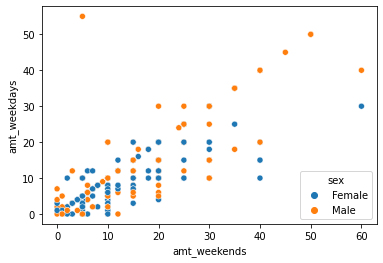

In [50]:
sns.scatterplot(x="amt_weekends", y="amt_weekdays", hue="sex", data=df)
plt.show()

## ANOVA
Next we would like to test if there is an association between the type of cigarettes UK smokers smoke and the amount that is smoked on the weekend. Specifically we would like to test if at least one pair of the cigarette types have means of the amount of cigarettes smoked on the weekend that are different.

First set up the hypotheses for this analysis. Give the test statistic, give the p-value. Finally make a conclusion with the p-value.

In [51]:
df['type'].value_counts()

Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: type, dtype: int64

$H_0: \mu_{packets}=\mu_{handrolled}=\mu_{bothmainlypackets}=\mu_{bothmainlyhandrolled}$

$H_A:$ at least one pair of population means (shown above) are different.


In [52]:
amod = smf.ols('amt_weekends ~ type', 
               data=df).fit()
amod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.692
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.168
Time:                        21:54:54   Log-Likelihood:                -1559.2
No. Observations:                 421   AIC:                             3126.
Df Residuals:                     417   BIC:                             3143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      19.5000      3.121      6.249      0.000      13.366      25.634
type[T.Both/Mainly Packets]    -0.7143      3.472     -0.206      0.837      -7.540       6.111
type[T.Hand-Rolled]            -2.3056      3.330     -0.692      0.489      -8.852       4.241
type[T.Packets]                -3.7189      3.173     -1.172      0.242      -9.956       2.518
==============================================================================
Omnibus:                       74.151   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.576
Skew:                           1.017   Prob(JB):                     4.42e-29
Kurtosis:                       4.819   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test-statistic for this test is 1.692 and the p-value is .168.

Thus, because $p-value\geq alpha=0.05$ we fail to reject the null hypothesis. Thus we do not have sufficient evidence to suggest that at least one pair of mean number of cigarettes smoked over the weekend for different smoking types are different.

### Visualize the relationship between smoking type and the amount smoked on the weekends in the data.

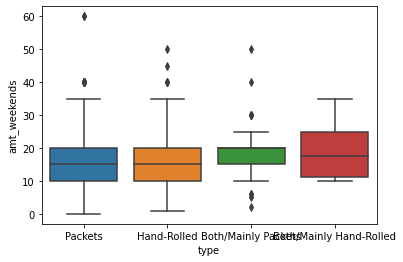

In [53]:
sns.boxplot(x="type", y="amt_weekends", data=df)
plt.show()

## Logistic Regression

### Build a logistic regression model with a response variable of being a packet (=1) vs. not-packet (=0) cigarette smoker and the following explanatory variables:
* amt_weekends
* amt_weekdays
* sex

In [54]:
df['y']=df['is_packet'].map({'Packets':1, 'Not_Packets':0})
df

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,is_scottish,is_packet,sqrt_amt_weekends,sqrt_amt_weekdays,y
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets,Not_Scottish,Packets,3.464102,3.464102,1
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets,Not_Scottish,Packets,2.449490,2.449490,1
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled,Not_Scottish,Not_Packets,2.828427,2.828427,0
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets,Not_Scottish,Packets,3.872983,3.464102,1
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets,Not_Scottish,Packets,2.449490,3.464102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Female,31,Single,GCSE/O Level,Scottish,"15,600 to 20,800",Scotland,Yes,20,10,Packets,Scottish,Packets,4.472136,3.162278,1
417,Male,24,Single,No Qualification,Scottish,"Under 2,600",Scotland,Yes,15,15,Hand-Rolled,Scottish,Not_Packets,3.872983,3.872983,0
418,Male,35,Married,No Qualification,Scottish,"10,400 to 15,600",Scotland,Yes,3,12,Packets,Scottish,Packets,1.732051,3.464102,1
419,Female,49,Divorced,Other/Sub Degree,English,"2,600 to 5,200",Scotland,Yes,20,20,Hand-Rolled,Not_Scottish,Not_Packets,4.472136,4.472136,0


In [55]:
logmod=smf.logit('y~amt_weekends+sex', data=df).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.580035
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  421
Model:                          Logit   Df Residuals:                      418
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                 0.04311
Time:                        21:54:54   Log-Likelihood:                -244.19
converged:                       True   LL-Null:                       -255.20
Covariance Type:            nonrobust   LLR p-value:                 1.669e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5738      0.234      6.712      0.000       1.114       2.033
sex[T.Male]     -0.9327      0.223     -4.191      0.000      -1.369      -0.497
amt_weekends    -0.0143      0.011     -1.320      0.187      -0.036       0.007
================================================================================
"""

### Give the fitted logistic regression equation here.

$log(\frac{\hat{p}}{(1-\hat{p})})=1.5738-.9327sexmale-0.0143amtweekends$

### What are the *odds* that a UK female that smokes 2 cigarettes on the weekend smokes packets?

In [56]:
logodds=1.5738-.9327*0-0.0143*2
print('log odds',logodds)
odds=np.exp(logodds)
print('odds',odds)

log odds 1.5452000000000001
odds 4.688909315113102


The odds that a UK female (that smokes 2 cigarettes on the weekend) smokes packets is 4.66.

(Put another way, the odds are 466 to 100).

### What is the predicted probability that a UK female that smokes 2 cigarettes on the weekends smokes packets?

In [57]:
p=odds/(1+odds)
print(p)

0.8242193811486133


### Calculate the p-value that determines whether there exists sufficient evidence to suggest that the odds multiplier for amt_weekends variable in the population logistic regression model is not equal to 1 by hand.

Because $\beta_2$ represents the population slope for amt_weekends, $e^{\beta_2}$ is the odds multiplier for the amt_weekends variable in the population logistic regression model.

$H_0: e^{\beta_2}=1$

$H_A: e^{\beta_2} \neq 1$

is equivalent to

$H_0: \beta_2=0$

$H_A: \beta_2 \neq 0$

In [58]:
sample_slope=-.0143
se=.011
null_value=0

z_stat=(sample_slope-null_value)/se
print("Test Statistic",z_stat)

p_value=2*(1-norm.cdf(np.abs(z_stat)))
print('pvalue', p_value)

Test Statistic -1.3
pvalue 0.1936009691712206


Because the $p-value \geq \alpha=0.05$ we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest $e^{\beta_2}$ is not equal to 1.

### If we increase the amount of cigarettes smoked on the weekend by 1, how do we expect the odds of smoking packets to change in the sample logistic regression model?

We expect the odds of smoking packets to change by a factor of .985.

In [59]:
np.exp(sample_slope)

0.9858017593695354

### What is the odds ratio for smoking packets for male smokers vs. female smokers? Interpret this.

In [60]:
np.exp(-0.9327)

0.39348985220841187

The odds of UK males smoking packets is smaller (by a factor of 0.39) than the odds of UK females smoking packets.